In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_csv("dataset.csv")
data.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [20]:
data.tail()

,text,humor
199995,Conor maynard seamlessly fits old-school r&b h...,False
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True
199998,Mcdonald's will officially kick off all-day br...,False
199999,An irish man walks on the street and ignores a...,True


In [21]:
data.shape

(200000, 2)

In [22]:
data.columns

Index(['text', 'humor'], dtype='object')

In [23]:
data.isnull().sum()

text     0
humor    0
dtype: int64

In [24]:
data['humor'].value_counts()

False    100000
True     100000
Name: humor, dtype: int64

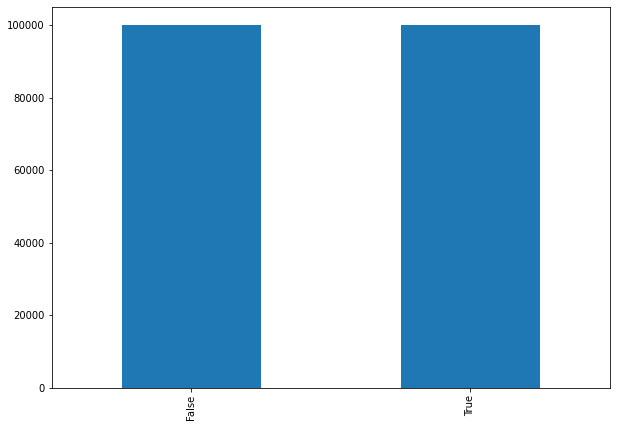

In [25]:
data1 = data['humor'].value_counts()
fig = plt.figure(figsize =(10, 7))
data1.plot.bar()
plt.show()

In [26]:
humor_data = data[data['humor'] == True]
humor_data

,text,humor
2,What do you call a turtle without its shell? d...,True
6,What is a pokemon master's favorite kind of pa...,True
7,Why do native americans hate it when it rains ...,True
9,"My family tree is a cactus, we're all pricks.",True
13,How are music and candy similar? we throw away...,True
...,...,...
199990,Where do eskimos keep their money? in snowbanks.,True
199993,What did the child with no arms get for christ...,True
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True


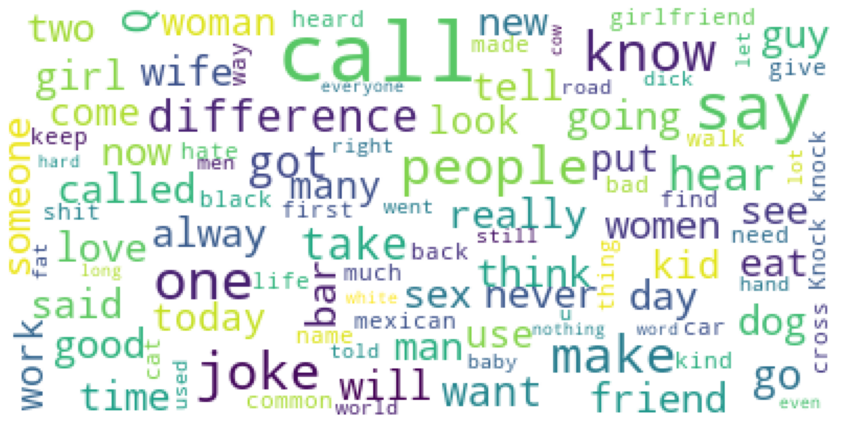

In [27]:
from wordcloud import WordCloud, STOPWORDS
texts = ' '.join(humor_data['text'])
stopwords = STOPWORDS
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=100, max_font_size=40,
random_state=42).generate(texts)
plt.figure(figsize = (15, 12), facecolor = None)
plt.axis('off')
plt.imshow(wordcloud);

In [28]:
non_humor_data = data[data['humor'] == False]
non_humor_data

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
5,"Martha stewart tweets hideous food photo, twit...",False
...,...,...
199991,Meet the billionaire who controls your ketchup...,False
199992,North korea stages large-scale artillery drill...,False
199994,Elizabeth taylor looked amazing even without d...,False
199995,Conor maynard seamlessly fits old-school r&b h...,False


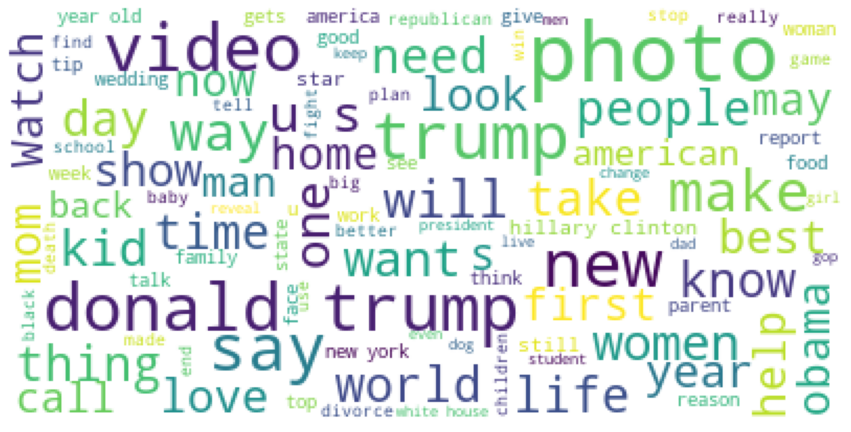

In [29]:
texts = ' '.join(non_humor_data['text'])
stopwords = STOPWORDS
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=100, max_font_size=40,
random_state=42).generate(texts)
plt.figure(figsize = (15, 12), facecolor = None)
plt.axis('off')
plt.imshow(wordcloud);

In [30]:
data['question'] = data['text'].str.contains('\?')
data

,text,humor,question
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,False
1,Watch: darvish gave hitter whiplash with slow ...,False,False
2,What do you call a turtle without its shell? d...,True,True
3,5 reasons the 2016 election feels so personal,False,False
4,"Pasco police shot mexican migrant from behind,...",False,False
...,...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False,False
199996,How to you make holy water? you boil the hell ...,True,True
199997,How many optometrists does it take to screw in...,True,True
199998,Mcdonald's will officially kick off all-day br...,False,False


In [31]:
data.groupby(['question', 'humor']).count()

text
question humor       
False    False  94745
         True   46944
True     False   5255
         True   53056

In [32]:
import re
import string
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yossri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
x = np.array(data["text"])
y = np.array(data["humor"])

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [41]:
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)


In [42]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [43]:
text1 = "I like sleeping. I just dont like going to sleep."
data = cv.transform([text1]).toarray()
print(clf.predict(data))

[ True]


In [44]:
text2 = "I wonder if the earth, teases other planets, for having no life."
data = cv.transform([text2]).toarray()
print(clf.predict(data))

[False]


In [45]:
text3 = "In the morning, there is a huge difference between 6:00 and 6:10."
data = cv.transform([text3]).toarray()
print(clf.predict(data))

[ True]


In [46]:
print("Training Accuracy :", clf.score(X_train, y_train))
print("Testing Accuracy :", clf.score(X_test, y_test))

Training Accuracy : 0.9999925373134328
Testing Accuracy : 0.8252727272727273
